In [50]:
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<h1> Rt Reviews Dataset

In [209]:
df_rtreview_info = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',encoding='windows-1252')
df_rtreview_info

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


<h3> Reviews Info

In [210]:
df_rtreview_info.describe()

## Top critic could be converted to Y or N, Rating could be renamed to "Rating_Score5" and be converted to an integer

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


<h5> Find out the "Fresh" Score

In [211]:
### Group by "fresh" score

df_rtreview_info['fresh'].value_counts()

totalscores = (33035 + 21397)
totalscores

percentage_of_not_fresh = (33035/totalscores)



percentage_of_fresh = (21397/totalscores)


print("Percentage of Movie Reviewers which are Not Fresh", round((percentage_of_not_fresh * 100)),"%")
print("Percentage of Movie Reviewers which are Fresh",round((percentage_of_fresh * 100)),"%")

Percentage of Movie Reviewers which are Not Fresh 61 %
Percentage of Movie Reviewers which are Fresh 39 %


<h5> Ratings Score

In [212]:
### Group by "rating" score

df_rtreview_info['rating'].value_counts()

3/5      4327
4/5      3672
3/4      3577
2/5      3160
2/4      2712
         ... 
2.2/5       1
5/4         1
1.7         1
1/2         1
6.7         1
Name: rating, Length: 186, dtype: int64

<h5> Types of Publishers

In [213]:
### Group by "rating" score

df_rtreview_info['publisher'].value_counts()

eFilmCritic.com         673
EmanuelLevy.Com         591
New York Times          590
Washington Post         565
Entertainment Weekly    541
                       ... 
Attitude                  1
Movie-Vault.com           1
Black Star News           1
Afro-American             1
LRM                       1
Name: publisher, Length: 1281, dtype: int64

<h2> IMDB DATASET

<h3> Import Movie Basics Folder

In [3]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT *

FROM movie_basics

""",conn)

### IMPORT THE DATA

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<H2> Objective: Recommend a type of genre/film length

<h5>  Inorder to determine types of popular genre we will be focusing on:
        <h6> - Highest Rated Genre (both in terms of "averagerating" and "numvotes" in the movie_ratings table)
        <h6> - Runtime vs Ratings Per Genre inorder to determine a time length

First, some exploration into Genres

<H3> Different Types of Genre Films Released Since 2010

In [4]:
## FOUND OUT HOW MANY TYPES OF GENRE FILMS THERE ARE

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT Genres ,COUNT(genres)

FROM movie_basics
WHERE runtime_minutes NOT LIKE 'NaN' AND start_year > 2010

GROUP BY genres
ORDER BY COUNT(genres) DESC

LIMIT 20;

""",conn)

### LOTS OF DOCUMENTARY AND DRAMA MOVIES

,genres,COUNT(genres)
0,Documentary,22666
1,Drama,14255
2,Comedy,5842
3,"Comedy,Drama",2891
4,Horror,2756
5,"Biography,Documentary",1855
6,Thriller,1782
7,"Drama,Romance",1632
8,"Documentary,Drama",1377
9,"Comedy,Drama,Romance",1298


<h4> Documentary and Drama seem to be the most popular, lets explore this some more and broaden our search

In [5]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Drama" or "Documentary"

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE GENRES LIKE '%Drama%' OR GENRES LIKE '%Documentary%'  AND start_year > 2010
GROUP BY genres
ORDER BY count(GENRES) DESC


""",conn)

###  Well, thats a lot!!! Lets limit it to a more sizable chunk... lets only look at Genres where there are more than 1000 films

,Run Time,Genres,Amount Of Films
0,74.801024,Documentary,29678
1,94.895008,Drama,21486
2,96.999684,"Comedy,Drama",3519
3,100.423034,"Drama,Romance",2079
4,61.815633,"Biography,Documentary",1915
...,...,...,...
402,78.000000,"Action,Documentary,Thriller",1
403,55.000000,"Action,Documentary,Mystery",1
404,68.000000,"Action,Documentary,Musical",1
405,43.000000,"Action,Documentary,Fantasy",1


In [205]:
### FIND AVERAGE RUNTIME OF MOVIES with over 1000 films 

conn = sqlite3.connect("zippedData/im.db")

df_genresof1k = pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE start_year > 2010
GROUP BY genres
ORDER BY count(GENRES) DESC

LIMIT 17

""",conn)

df_genresof1k.info()

###  There only seem to be 17 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that have more than 1000 films 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Run Time         17 non-null     float64
 1   Genres           17 non-null     object 
 2   Amount Of Films  17 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


In [207]:
### FIND AVERAGE RUNTIME OF MOVIES with over 1000 films 

conn = sqlite3.connect("zippedData/im.db")

df_genres = pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE start_year > 2010
GROUP BY genres
ORDER BY count(GENRES) DESC


""",conn)

df_genres

###  There only seem to be 17 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that have more than 1000 films 

,Run Time,Genres,Amount Of Films
0,74.801024,Documentary,29678
1,94.981129,Drama,19674
2,93.229031,Comedy,8439
3,85.271045,Horror,4089
4,96.986856,"Comedy,Drama",3221
...,...,...,...
1060,49.000000,"Action,Animation,History",1
1061,66.000000,"Action,Animation,Documentary",1
1062,100.000000,"Action,Animation,Biography",1
1063,97.000000,"Action,Adventure,Musical",1


In [273]:
### FIND AVERAGE RUNTIME OF MOVIES with over 1000 films 

conn = sqlite3.connect("zippedData/im.db")

df_genresof1kshrunk = pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE start_year > 2010 AND runtime_minutes != "Nan" AND runtime_minutes != "None" AND GENRES IN (
    SELECT DISTINCT(GENRES)

    FROM movie_basics
    )
    

GROUP BY GENRES

ORDER BY "Amount Of Films" DESC

LIMIT 20

""",conn)

df_genresof1kshrunk

###  There only seem to be 17 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that have more than 1000 films 

,Run Time,Genres,Amount Of Films
0,74.801024,Documentary,22666
1,94.981129,Drama,14255
2,93.229031,Comedy,5842
3,96.986856,"Comedy,Drama",2891
4,85.271045,Horror,2756
5,61.815633,"Biography,Documentary",1855
6,92.974186,Thriller,1782
7,100.467525,"Drama,Romance",1632
8,72.724764,"Documentary,Drama",1377
9,97.744222,"Comedy,Drama,Romance",1298


In [229]:
#### NEED TO SPLIT THE DATA BASED ON THE MAIN GENRES!!!  
##### PUT THE GENRES BACK INTO IT AND MAKE SURE ITS ONLY GETTING COUNTED ONCE!!!!! 


[Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Number OF Films'),
 Text(0.5, 1.0, 'Worldwide Genres with over 1000 films released since 2010')]

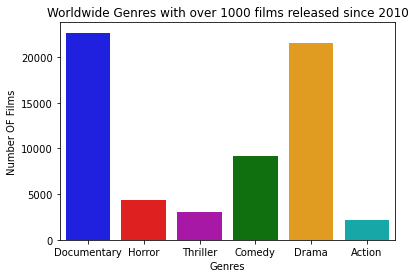

In [230]:
#df_genresof1kshrunk.plot(kind = "bar", x = "Genres", y ="Amount Of Films")

#plt.title("Worldwide Genres with over 1000 films released since 2010")
#plt.xlabel("Genres")
#plt.ylabel("Number OF Films")
#plt.show()
my_pal = {"Documentary": "b", "Drama": "orange", "Comedy":"g", "Horror":"r", "Thriller":"m", "Action":"c"}
sns.barplot(x = df_genresof1kshrunk['Genres'],y = df_genresof1kshrunk['Amount Of Films'] , palette = my_pal).set(xlabel = "Genres", ylabel = "Number OF Films",title = "Worldwide Genres with over 1000 films released since 2010")



In [10]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Documentary"

conn = sqlite3.connect("zippedData/im.db")

df_documentary = pd.read_sql("""
SELECT primary_title AS "Movie", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Documentary' AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY runtime_minutes DESC;

""",conn)

df_documentary

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Movie,Run Time
0,Logistics,51420.0
1,Modern Times Forever,14400.0
2,Nari,6017.0
3,A Time to Stir,1320.0
4,Pakistan: Education and Women,1184.0
...,...,...
22661,There,2.0
22662,Great Valley Nature Center Documentary,1.0
22663,A Serendipitous Exploration,1.0
22664,Isa One Minute Portrait,1.0


In [11]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Drama"

conn = sqlite3.connect("zippedData/im.db")

df_drama = pd.read_sql("""
SELECT primary_title AS "Movie", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Drama' AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY runtime_minutes DESC;


""",conn)

df_drama

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Movie,Run Time
0,A 2nd generation film,3077.0
1,Aberration,1834.0
2,The Nothing Movie,1559.0
3,The Innocence,1260.0
4,Breaking Yop,1151.0
...,...,...
14250,BattleScar,9.0
14251,Dominic,7.0
14252,The Last of Us,4.0
14253,Home,4.0


In [12]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Action"

conn = sqlite3.connect("zippedData/im.db")

df_action = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Action' AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY runtime_minutes DESC;


""",conn)

df_action

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Movies,Run Time
0,h36:,2160.0
1,Akin,310.0
2,Broken Hearts,300.0
3,Walls,272.0
4,Lipstick and Bullets,254.0
...,...,...
1048,Lock Down,45.0
1049,Bike Cop: Begins,45.0
1050,Lost Angels United,45.0
1051,As Cobaias,45.0


In [13]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Comedy"

conn = sqlite3.connect("zippedData/im.db")

df_comedy = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Comedy' AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY runtime_minutes DESC;


""",conn)

df_comedy

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 


,Movies,Run Time
0,Stuck,360.0
1,The Phineas And Ferb Show,285.0
2,Friends with Awkwardness,241.0
3,Rooster Teeth: Best of RT Shorts and Animated ...,233.0
4,Kinks,223.0
...,...,...
5837,Kõik koletised on väljamõeldud,45.0
5838,Femmebot PhD,20.0
5839,Waiting On You,8.0
5840,Confession,8.0


In [14]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "horror"

conn = sqlite3.connect("zippedData/im.db")

df_horror = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Horror' AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY runtime_minutes DESC;

""",conn)

df_horror

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Movies,Run Time
0,Fan,623.0
1,Zombie Horror Fright Fest!,360.0
2,Cry of Fear,203.0
3,Mrtvý autobus,192.0
4,The Rake Creatures,183.0
...,...,...
2751,Ghost of Roundhouse Park,13.0
2752,Under the Bed,7.0
2753,Next,7.0
2754,Out of Mind,6.0


In [15]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Thriller"

conn = sqlite3.connect("zippedData/im.db")

df_thriller = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time"

FROM movie_basics
WHERE GENRES LIKE 'Thriller' AND start_year > 2010 AND runtime_minutes != "Nan"


""",conn)

df_thriller

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Movies,Run Time
0,Dark Blood,86.0
1,Escalade,80.0
2,The Yellow Wallpaper,115.0
3,When I Became a Butterfly,102.0
4,Lo peor de los deseos,93.0
...,...,...
1777,Obsession,58.0
1778,Eight,88.0
1779,Kadhal Mattum Vena,94.0
1780,Maaya,120.0


<h4> Runtime All Main Genres

In [202]:
### FIND AVERAGE RUNTIME OF ALL Major MOVIE Categoreies

conn = sqlite3.connect("zippedData/im.db")

df_maingenreruntime = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES


FROM movie_basics
WHERE GENRES LIKE "Documentary" 
    OR GENRES LIKE "Drama" 
    OR GENRES LIKE "Comedy" 
    OR GENRES LIKE "Horror" 
    OR GENRES LIKE "Thriller" 
    OR GENRES LIKE "Action"

AND start_year > 2010 AND runtime_minutes != "Nan"

ORDER BY GENRES


""",conn)

df_maingenreruntime.info()

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71319 entries, 0 to 71318
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movies    71319 non-null  object 
 1   Run Time  52762 non-null  float64
 2   genres    71319 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


<h4> Amount Of Films released since 2010

(30.0, 180.0)

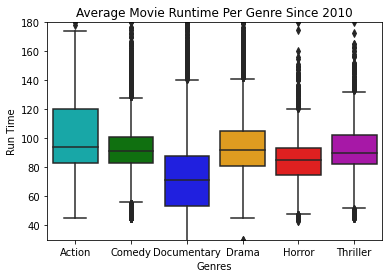

In [201]:
my_pal = {"Documentary": "b", "Drama": "orange", "Comedy":"g", "Horror":"r", "Thriller":"m", "Action":"c"}

sns.boxplot(x = df_maingenreruntime['genres'],y = df_maingenreruntime['Run Time'], palette = my_pal).set(xlabel = "Genres", ylabel = "Run Time",title = "Average Movie Runtime Per Genre Since 2010")
plt.ylim(30,180)




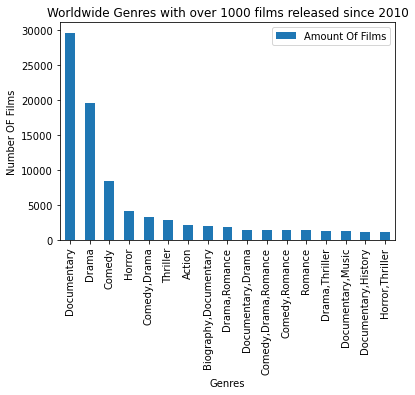

In [16]:
df_genresof1k.plot(kind = "bar", x = "Genres", y ="Amount Of Films")

plt.title("Worldwide Genres with over 1000 films released since 2010")
plt.xlabel("Genres")
plt.ylabel("Number OF Films")
plt.show()



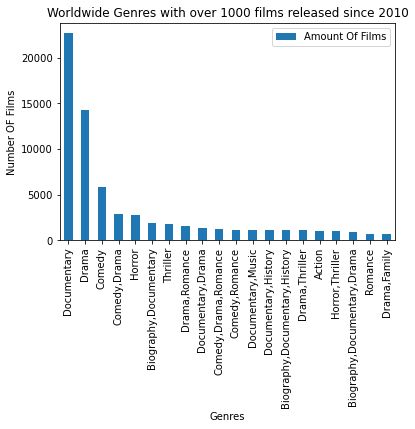

In [275]:


df_genresof1kshrunk.plot(kind = "bar", x = "Genres", y ="Amount Of Films")

plt.title("Worldwide Genres with over 1000 films released since 2010")
plt.xlabel("Genres")
plt.ylabel("Number OF Films")
plt.show()



<h4> Runtime of the most popular Film Genres since 2010 (based on the amount of films)

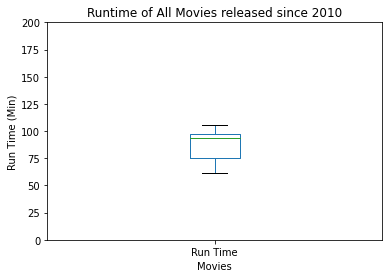

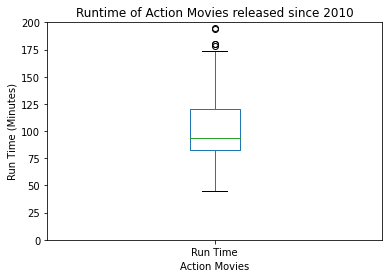

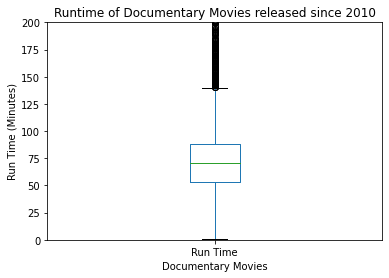

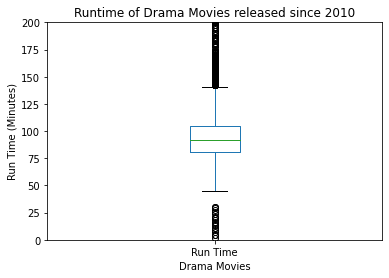

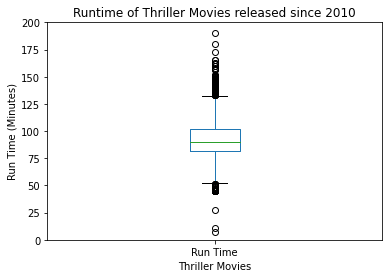

In [17]:
df_genresof1k.plot(kind = "box" , y = "Run Time")

plt.title("Runtime of All Movies released since 2010")
plt.xlabel("Movies")
plt.ylabel("Run Time (Min)")
plt.ylim(0,200)

plt.show()

df_action.plot(kind = "box" , y = "Run Time")

plt.title("Runtime of Action Movies released since 2010")
plt.xlabel("Action Movies")
plt.ylabel("Run Time (Minutes)")
plt.ylim(0,200)
plt.show()

df_documentary.plot(kind = "box" , y = "Run Time")

plt.title("Runtime of Documentary Movies released since 2010")
plt.xlabel("Documentary Movies")
plt.ylabel("Run Time (Minutes)")
plt.ylim(0,200)
plt.show()

df_drama.plot(kind = "box" , y = "Run Time")

plt.title("Runtime of Drama Movies released since 2010")
plt.xlabel("Drama Movies")
plt.ylabel("Run Time (Minutes)")
plt.ylim(0,200)
plt.show()

df_thriller.plot(kind = "box" , y = "Run Time")

plt.title("Runtime of Thriller Movies released since 2010")
plt.xlabel("Thriller Movies")
plt.ylabel("Run Time (Minutes)")
plt.ylim(0,200)
plt.show()

In [ ]:
sns.barplot(x = df_highestratingofall['Genres'],y = df_highestratingofall['numvotes']).set(xlabel = "Genres", ylabel = "Average Ratings",title = "Number of Votes Per Genre Since 2010")


<h2> Don't Use!!

In [18]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Drama" or "Documentary"

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT primary_title, GENRES AS "Genres", averagerating, start_year,runtime_minutes

FROM movie_basics

JOIN(movie_ratings)
    USING(movie_id)
    
JOIN(movie_akas)
    USING(movie_id)

WHERE GENRES LIKE '%Documentary%' AND start_year > 2010 AND averagerating > 7 AND REGION = "US"
ORDER BY averagerating DESC;

""",conn)

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,primary_title,Genres,averagerating,start_year,runtime_minutes
0,Revolution Food,Documentary,10.0,2015,70.0
1,All Around Us,Documentary,10.0,2019,NaN
2,Ellis Island: The Making of a Master Race in A...,"Documentary,History",10.0,2018,70.0
3,Fly High: Story of the Disc Dog,Documentary,10.0,2019,65.0
4,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.0,2015,93.0
...,...,...,...,...,...
4060,Survivors Guide to Prison,Documentary,7.1,2018,102.0
4061,The Hunt for Ted Bundy,Documentary,7.1,2015,NaN
4062,The Man Who Saved Ben-Hur,Documentary,7.1,2016,60.0
4063,Straight Outta Dudleyville: The Legacy of the ...,"Biography,Documentary,Sport",7.1,2016,NaN


<h5> Films from the past 10 years that are 11 genres categorized under "Drama" or "Documentary" that have more than 1000 films 

<h4> Lets find the average runtime and ratings for this category of movies in these genres

In [178]:
### FIND AVERAGE RUNTIME OF MOVIES That are categorized as "Drama" or "Documentary"

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films", averagerating, numvotes

FROM movie_basics

JOIN(movie_ratings)
    USING(movie_id)

WHERE GENRES LIKE '%Drama%' OR GENRES LIKE '%Documentary%'  AND start_year > 2010
GROUP BY genres
ORDER BY count(GENRES) DESC

LIMIT 11

""",conn)

###  There only seem to be 11 GENRES that have more than 1000 films so lets limit our search to just focusing there.  
### Films from the past 10 years that are categorized under "Drama" or "Documentary" that have more than 1000 films 

,Run Time,Genres,Amount Of Films,averagerating,numvotes
0,97.633723,Drama,11612,6.9,4517
1,89.937192,Documentary,9402,7.6,53
2,98.529988,"Comedy,Drama",2617,6.1,13
3,103.239943,"Drama,Romance",1510,4.1,1571
4,100.415876,"Comedy,Drama,Romance",1208,6.4,6287
5,96.281450,"Drama,Thriller",990,7.5,26
6,80.306156,"Biography,Documentary",618,6.0,6
7,79.342657,"Documentary,Drama",582,6.8,748
8,104.958491,"Action,Crime,Drama",562,7.0,77
9,89.036810,"Documentary,Music",521,8.5,29725


<h3> Average Runtime of Documetary Movies - Since 2010

In [145]:
### FIND AVERAGE RUNTIME OF MOVIES LIKE "Documentary"

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE GENRES LIKE '%Documentary%' AND start_year > 2010

GROUP BY genres
ORDER BY runtime_minutes DESC;

""",conn)

###  

,Run Time,Genres,Amount Of Films
0,74.801024,Documentary,29678
1,86.285714,"Action,Crime,Documentary",8
2,98.333333,"Documentary,Drama,Horror",3
3,70.500000,"Crime,Documentary,Romance",2
4,72.000000,"Documentary,Sport,Thriller",2
...,...,...,...
197,68.959964,"Documentary,History",1163
198,71.382609,"Crime,Documentary,Drama",120
199,56.500000,"Comedy,Documentary,Sport",9
200,61.815633,"Biography,Documentary",1915


<h3> Average Runtime of Drama and Documentary Movies - Since 2010

In [156]:
### FIND AVERAGE RUNTIME OF MOVIES LIKE "Drama"

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT AVG(runtime_minutes) AS "Run Time", GENRES AS "Genres", count(GENRES) AS "Amount Of Films"

FROM movie_basics
WHERE GENRES LIKE '%Drama%' AND GENRES LIKE '%Documentary%'  AND start_year > 2010
GROUP BY genres
ORDER BY count(GENRES) DESC;

""",conn)

###  EVEN SOME THAT CONTAIN BOTH!!!  21 Types!! 

,Run Time,Genres,Amount Of Films
0,72.724764,"Documentary,Drama",1414
1,69.790960,"Biography,Documentary,Drama",901
2,65.089385,"Documentary,Drama,Family",364
3,76.081761,"Documentary,Drama,History",329
4,71.078125,"Comedy,Documentary,Drama",257
5,75.252174,"Adventure,Documentary,Drama",231
6,67.767442,"Documentary,Drama,News",133
7,71.382609,"Crime,Documentary,Drama",120
8,70.925000,"Documentary,Drama,Music",80
9,69.420290,"Documentary,Drama,Sport",69


<h4> While it is great to know there are lots of Documentarys and Drama films, inorder to discover people's sentiment towards certain movies we'll have to bring in the "Movie Ratings" inorder to determine people's sentiment.  We will start with Highest Rated Genre since 2010

<H2> Import Movie Ratings

<h5> Highest Rated Genre since 2010

In [360]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT averagerating, numvotes, start_year, runtime_minutes, genres

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND runtime_minutes != "NaN"
GROUP BY GENRES LIKE "%Adventure%"
ORDER BY numvotes DESC, averagerating DESC

LIMIT 20

;

""",conn)

### IMPORT THE DATA

,averagerating,numvotes,start_year,runtime_minutes,genres
0,8.1,263,2017,83.0,"Adventure,Animation,Comedy"
1,7.0,77,2013,175.0,"Action,Crime,Drama"
2,6.6,8,2018,134.0,None


<h4> Highest Ratings Of Genre

In [334]:
### HIGHEST RATINGS OF GENRES

conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT runtime_minutes, GENRES AS "Genres", count(GENRES) AS "Amount Of Films", numvotes, AVG(averagerating) AS "Average Ratings"

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)


WHERE start_year > 2010
GROUP BY genres
ORDER BY AVG(averagerating) DESC



""",conn)

###  Well, thats a lot!!! Lets limit it to a more sizable chunk... lets only look at Genres where there are more than 1000 films

,runtime_minutes,Genres,Amount Of Films,numvotes,Average Ratings
0,70.0,"Comedy,Documentary,Fantasy",1,5,9.4
1,59.0,"Documentary,Family,Musical",1,19,9.3
2,NaN,"History,Sport",1,5,9.2
3,NaN,"Music,Mystery",1,5,9.0
4,130.0,Game-Show,1,7,9.0
...,...,...,...,...,...
904,94.0,"Crime,Music",1,88,2.4
905,120.0,"History,Sci-Fi,Thriller",1,227,2.3
906,86.0,"Adventure,Crime,Romance",1,9,2.3
907,120.0,"Adult,Horror",1,128,2.0


<h4> High Number Of Votes per Genres

In [386]:
### HIGHEST RATINGS OF GENRES

conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotespergenre = pd.read_sql("""
SELECT runtime_minutes, GENRES AS "Genres", count(GENRES) AS "Amount Of Films", numvotes, AVG(averagerating) AS "Average Ratings"

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)


WHERE start_year > 2010 
    AND GENRES LIKE "Documentary" 
    OR GENRES LIKE "Drama" 
    OR GENRES LIKE "Comedy" 
    OR GENRES LIKE "Horror" 
    OR GENRES LIKE "Thriller" 
    OR GENRES LIKE "Action"
GROUP BY genres
ORDER BY numvotes DESC



""",conn)


df_highestnumvotespergenre


###  Well, thats a lot!!! Lets limit it to a more sizable chunk... lets only look at Genres where there are more than 1000 films

,runtime_minutes,Genres,Amount Of Films,numvotes,Average Ratings
0,122.0,Drama,11612,4517,6.494265
1,98.0,Horror,2692,2420,4.835475
2,86.0,Thriller,1555,1053,5.704244
3,100.0,Comedy,5613,219,5.777998
4,180.0,Documentary,9402,53,7.302095
5,137.0,Action,979,16,5.757712


<h4> Lets Narrow the scope some more... and look at each genre

In [ ]:
### HIGHEST RATINGS OF GENRES

In [19]:
### Documentary
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesDoc = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Documentary" 

ORDER BY numvotes DESC

""",conn)

df_highestnumvotesDoc

,Movies,Run Time,Genres,numvotes,averagerating
0,Going Clear: Scientology & the Prison of Belief,119.0,Documentary,34387,8.0
1,Jiro Dreams of Sushi,81.0,Documentary,30803,7.9
2,What the Health,97.0,Documentary,23134,7.7
3,Leaving Neverland,240.0,Documentary,19632,7.1
4,Room 237,102.0,Documentary,19601,6.2
...,...,...,...,...,...
9397,Pian hän tulee,69.0,Documentary,5,6.6
9398,The Cacophony of Donbas,62.0,Documentary,5,4.6
9399,Conversazione su Tiresia,NaN,Documentary,5,8.4
9400,The Projectionist,81.0,Documentary,5,7.0


<h3> Highest Ratings of all

In [185]:
### Highest Ratings Of All
conn = sqlite3.connect("zippedData/im.db")

df_highestratingofall = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 
    AND GENRES LIKE "Documentary" 
    OR GENRES LIKE "Drama" 
    OR GENRES LIKE "Comedy" 
    OR GENRES LIKE "Horror" 
    OR GENRES LIKE "Thriller" 
    OR GENRES LIKE "Action"

ORDER BY GENRES ASC
""",conn)

df_highestratingofall

,Movies,Run Time,Genres,numvotes,averagerating
0,Aman Ke Farishtey,137.0,Action,16,6.4
1,Segurança Nacional,86.0,Action,260,3.3
2,Cross the Line,87.0,Action,39,3.9
3,Gangster Exchange,95.0,Action,436,4.6
4,Deep Gold 3D,86.0,Action,315,3.3
...,...,...,...,...,...
31848,Risknamaa,123.0,Thriller,9,8.0
31849,Breakaway,85.0,Thriller,75,4.9
31850,Girl Dorm,88.0,Thriller,25,6.0
31851,Nightmare Tenant,90.0,Thriller,98,6.0


In [184]:
### Drama
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesDrama = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Drama" 

ORDER BY GENRES ASC

""",conn)

df_highestnumvotesDrama

,Movies,Run Time,Genres,numvotes,averagerating
0,The Other Side of the Wind,122.0,Drama,4517,6.9
1,Heaven & Hell,104.0,Drama,72,4.0
2,On kadin,NaN,Drama,100,7.1
3,Haar Jeet,NaN,Drama,9,5.1
4,Cloud Cuckoo Land,92.0,Drama,23,7.6
...,...,...,...,...,...
10446,Turned Out,131.0,Drama,8,8.9
10447,Hansa Ek Sanyog,135.0,Drama,8,7.8
10448,Ottam,120.0,Drama,505,8.1
10449,Pengalila,111.0,Drama,600,8.4


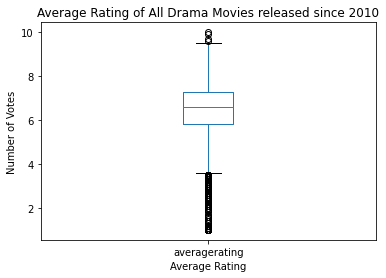

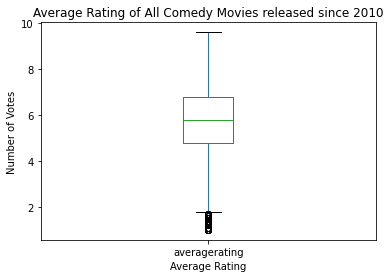

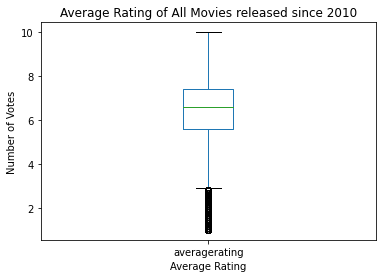

In [72]:
df_highestnumvotesDrama.plot(kind = "box", x = "numvotes", y ="averagerating")

plt.title("Average Rating of All Drama Movies released since 2010")
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")

plt.show()

df_highestnumvotesComedy.plot(kind = "box", x = "numvotes", y ="averagerating")

plt.title("Average Rating of All Comedy Movies released since 2010")
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")

plt.show()

df_highestratingofall.plot(kind = "box", x = "numvotes", y ="averagerating")

plt.title("Average Rating of All Movies released since 2010")
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")

plt.show()

# plot
#plt.figure(figsize=(8, 6))
#sns.boxplot(data=df_highestratingofall, x = "numvotes", y ="averagerating")






[Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Average Ratings'),
 Text(0.5, 1.0, 'Number of Votes Per Genre Since 2010')]

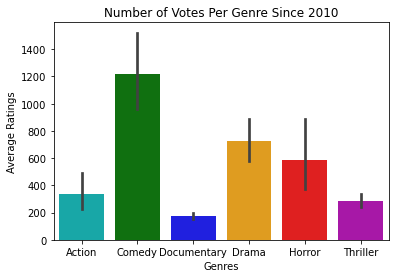

In [186]:

my_pal = {"Documentary": "b", "Drama": "orange", "Comedy":"g", "Horror":"r", "Thriller":"m", "Action":"c"}

sns.barplot(x = df_highestratingofall['Genres'],y = df_highestratingofall['numvotes'], palette = my_pal).set(xlabel = "Genres", ylabel = "Average Ratings",title = "Number of Votes Per Genre Since 2010")


[Text(0.5, 0, 'Genres'),
 Text(0, 0.5, 'Average Ratings'),
 Text(0.5, 1.0, 'Average Film Ratings Per Genre Since 2010')]

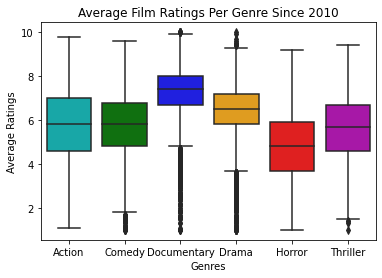

In [172]:
my_pal = {"Documentary": "b", "Drama": "orange", "Comedy":"g", "Horror":"r", "Thriller":"m", "Action":"c"}

sns.boxplot(x = df_highestratingofall['Genres'],y = df_highestratingofall['averagerating'], palette = my_pal).set(xlabel = "Genres", ylabel = "Average Ratings",title = "Average Film Ratings Per Genre Since 2010")


In [ ]:
### Comedy
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesComedy = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Comedy" 

ORDER BY numvotes DESC

""",conn)

df_highestnumvotesComedy

In [23]:
### Horror
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesHorror = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Horror" 

ORDER BY numvotes DESC

""",conn)

df_highestnumvotesHorror

,Movies,Run Time,Genres,numvotes,averagerating
0,The Cabin in the Woods,95.0,Horror,338445,7.0
1,Final Destination 5,92.0,Horror,98061,5.9
2,Silent Hill: Revelation,95.0,Horror,56832,5.0
3,Grave Encounters,92.0,Horror,48125,6.1
4,The Devil Inside,83.0,Horror,33522,4.2
...,...,...,...,...,...
2468,Blood Alley - Chillicothe Makes a Movie,72.0,Horror,5,7.0
2469,Virgin Genocide,51.0,Horror,5,3.2
2470,Undead Silence,93.0,Horror,5,8.4
2471,Sangue misto,90.0,Horror,5,2.0


In [ ]:
### Thriller
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesThriller = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Thriller" 

ORDER BY numvotes DESC

""",conn)

df_highestnumvotesThriller

In [ ]:
### Action
conn = sqlite3.connect("zippedData/im.db")

df_highestnumvotesAction = pd.read_sql("""
SELECT primary_title AS "Movies", runtime_minutes AS "Run Time", GENRES AS "Genres", numvotes, averagerating

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE start_year > 2010 AND GENRES LIKE "Action" 

ORDER BY numvotes DESC

""",conn)

df_highestnumvotesAction

<h3> What is the Highest Rated Genre?

<h5> Need to determine what genre is rated the best, lets use straight average rating for this model to start

In [ ]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT *

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)


""",conn)

### IMPORT THE DATA

In [ ]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT averagerating, numvotes, genres, count(GENRES) AS "Amount Of Films"

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

GROUP BY genres
ORDER BY averagerating DESC;

""",conn)

### IMPORT THE DATA

<h5> Highest Rated Genre Seems to be "Comedy, Documentary, Sports", "Documentary, Drama", "War, Comedy, Documentary, Fantasy", "Musicals" but all have extremely small number of votes and films

<h4> Lets determine what size based on number number of votes is greater than 100

In [ ]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT averagerating, numvotes, genres, count(GENRES) AS Amount_Of_Films

FROM movie_ratings

JOIN movie_basics
    USING(movie_id)

WHERE numvotes >= 750 AND start_year > 2010

GROUP BY genres
ORDER BY averagerating DESC;

""",conn)

### IMPORT THE DATA

<h5> What's the runtime length of these movies

In [ ]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT averagerating as "Average Ratings", numvotes as"Number of Votes", genres as "Genres", runtime_minutes as "Run Time"

FROM movie_akas

JOIN movie_basics
    USING(movie_id)

JOIN movie_ratings
    USING(movie_id)

GROUP BY genres
ORDER BY runtime_minutes DESC

""",conn)

### IMPORT THE DATA

In [189]:
conn = sqlite3.connect("zippedData/im.db")

pd.read_sql("""
SELECT *
FROM movie_akas

JOIN movie_basics
    USING(movie_id)
    
JOIN movie_ratings
    USING(movie_id)

WHERE region = "US"


ORDER BY numvotes DESC

LIMIT 20;

""",conn)

### Number of Votes in the US is greater in "Action", "Adventure", "Sci-Fi"

,movie_id,ordering,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,24,Inception,US,None,imdbDisplay,None,0.0,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1375666,30,Oliver's Arrow,US,None,None,fake working title,0.0,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,tt1375666,42,Inception: The IMAX Experience,US,None,None,IMAX version,0.0,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
3,tt1375666,8,Inception,US,en,None,None,0.0,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
4,tt1345836,14,Arkham,US,None,working,None,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
5,tt1345836,16,Gotham,US,None,working,None,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
6,tt1345836,17,Batman 3,US,None,working,None,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
7,tt1345836,28,The Dark Knight Rises: The IMAX Experience,US,None,None,IMAX version,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
8,tt1345836,48,T.D.K.R.,US,None,None,informal short title,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
9,tt1345836,9,Magnus Rex,US,None,None,fake working title,0.0,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769


In [ ]:
### DO SOME JOIN STAT

In [ ]:
### find the highest rated movie based on genre, and runtime of the movie, - number of votes, genre, year released, etc